# Tarea #2: Los buenos ejemplos se copian

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

## Problema 1: Behavioural finance

In [192]:
from IPython.display import Image

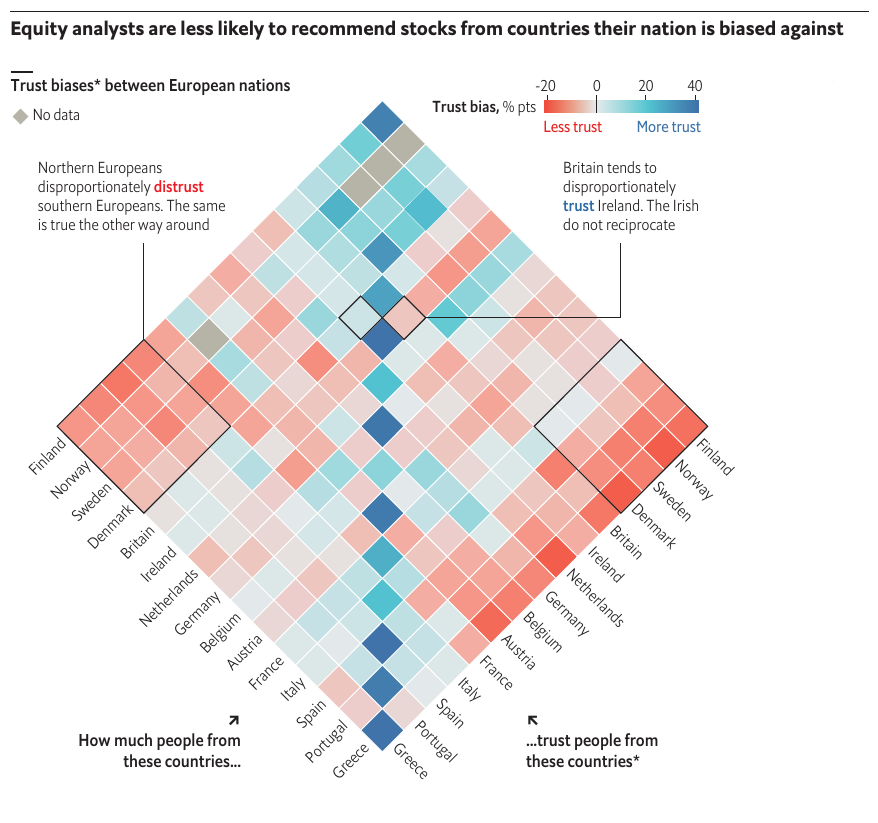

In [193]:
Image("./images/01-behavioural-finance.png")

### Datos

Los datos fueron sacados de [este paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3153900) (Table IA.I). Como la idea de esta tarea no es enfocarse en la extracción de datos, el archivo `csv` con los datos de la tabla ya son entregados en `data/01-behavioural-finance.csv`

### Modifique la coloracion a mi parecer

In [194]:
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', ( 
    (0.000, (0.941, 0.302, 0.239)),
    (0.333, (0.890, 0.914, 0.922)),
    (0.666, (0.353, 0.780, 0.820)),
    (1.000, (0.247, 0.436, 0.671))))


### Ayuda 2

Una de las partes más difíciles de esta tarea puede ser rotar el gráfico. Como la idea de la tarea es ejercitar otro tipo de habilidades, aquí se entrega una función que permitirá rotar el gráfico.

In [195]:
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext

In [196]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0],0, df.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

### Aqui inicia el desarrollo de la Tarea

In [197]:
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import lines
from matplotlib import patches
from matplotlib.transforms import ScaledTranslation
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv(r'.\data\01-behavioural-finance.csv', index_col="Origin of trust")
df.head()
ordered_columns = ['Fin','Nor','Swe','Den','UK','Ire','NL','Ger','Bel','Aus','Fra','Ita','Spa','Por','Gre']
nombres = ['Finland','Norway','Sweden','Denmark','Britain','Ireland','Netherlands','Germany','Belgium','Austria','France','Italy','Spain','Portugal','Greece']

In [198]:
df1 = df.loc[:,ordered_columns]
df1 = df1.reindex(ordered_columns)

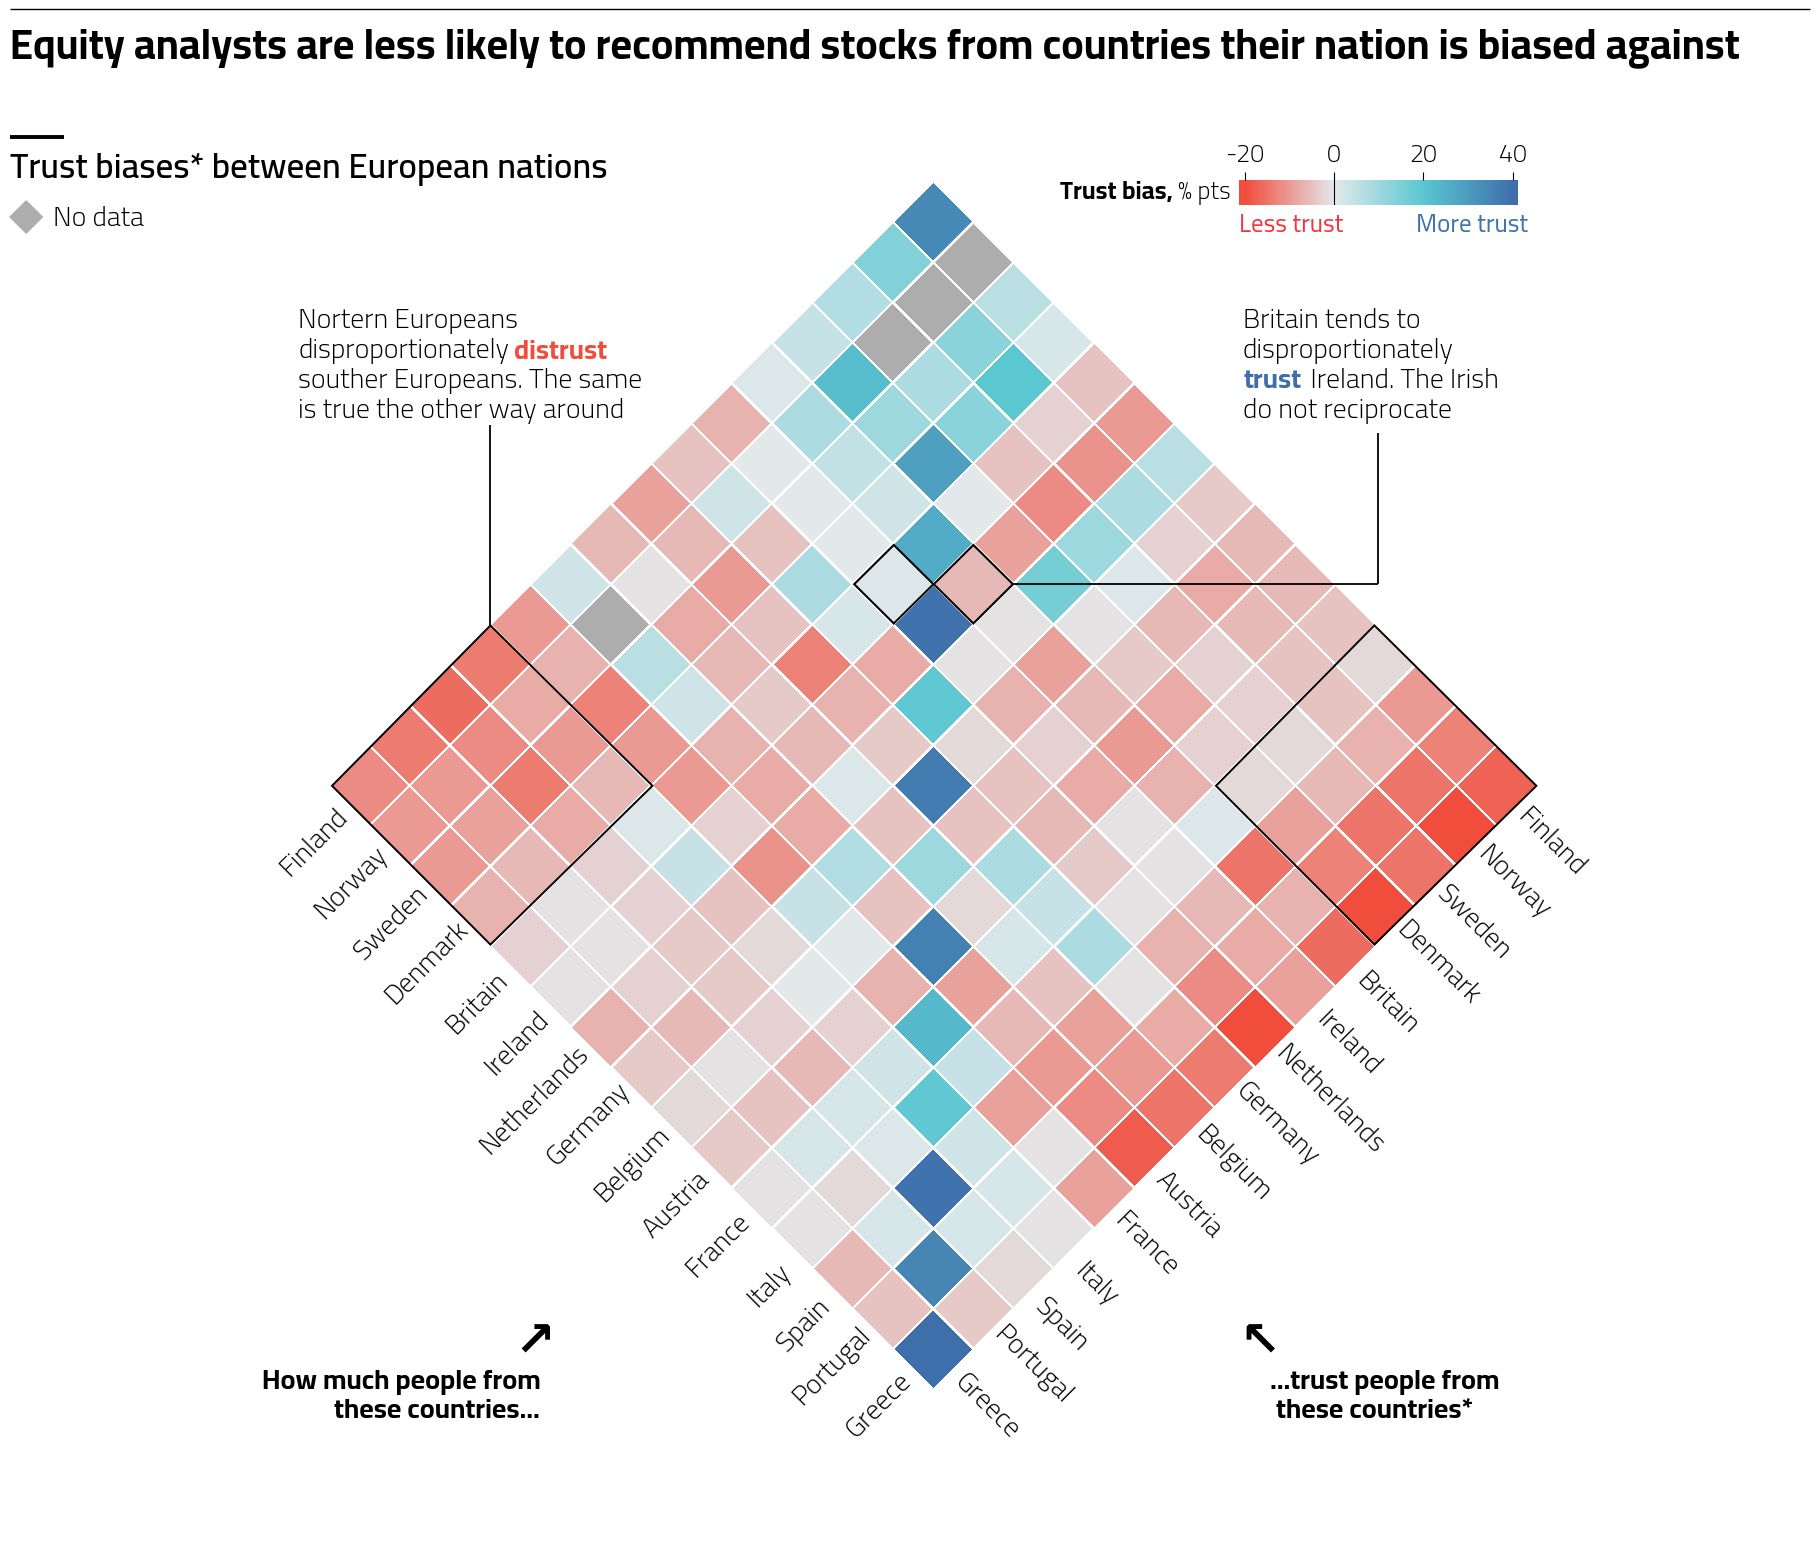

In [199]:
fig, ax = plt.subplots(1,1, figsize=(18, 16)) #crear figura y ejes

ax0 = rotate_axes(fig, 111,225) #rotar el eje
ax.set_axis_off()

# creación del Heatmap en eje rotado
ax1 = sns.heatmap(data=df1, 
            cmap=my_gradient,
            ax=ax0, #eje rotado
            linewidth=1,
            cbar=False,  # se crea una barra personalisada más adelante 
            
            )
ax1.collections[0].cmap.set_bad('0.68') #gris para Nans

#barra color personalizada
cb = fig.colorbar(ScalarMappable( cmap=my_gradient),  
                            ax=ax, 
                            orientation='horizontal', 
                            anchor=(.9,7.5),  #posicion
                            shrink=0.20, #tamaño
                            aspect=11, #ratio largo/ancho
                            extend='both',
                            extendrect=True,
                            extendfrac=0.02, # % fuera mas alla del los limites
                            
                            )
cb.outline.set_visible(False) #remover el borde del mapa de color
cb.set_ticks(ticks=[0, 0.333, 0.666, 1], labels=['-20', '0', '20', '40'], fontfamily='Cairo', size=18, weight=350) #setear la posicion de los ticks
cb.ax.xaxis.set_ticks_position('top')
cb.ax.axvline(0.333, color='k', linewidth=0.8)
cb.ax.tick_params(length=6)
#texto mapa color
cb.ax.text(x=-0.69, y=0.3, s="Trust bias, ", fontfamily="Cairo",weight='bold', size=18)
cb.ax.text(x=-0.25, y=0.3, s="% pts", fontfamily="Cairo",weight=350 , size=18)
cb.ax.text(x=-0.02, y=-1., s="Less trust", fontfamily="Cairo", size=18, color='#ee3940')
cb.ax.text(x=0.64, y=-1., s="More trust", fontfamily="Cairo", size=18, color='#3f73a9')

#Linea negra arriba de todo
fig.add_artist(lines.Line2D([0, 1], [0.98, 0.98], lw=1, color='k', solid_capstyle="butt")) 

#texto luego de la linea
fig.text(x=0,y=0.95, s="Equity analysts are less likely to recommend stocks from countries their nation is biased against",  
        fontfamily="Cairo", size=30, color='k', weight='bold') 

#Linea negra numero 2
fig.add_artist(lines.Line2D([0, 0.03], [0.90, 0.90], lw=2.8, color='k', solid_capstyle="butt")) 

#texto luego de la linea 2
fig.text(x=0,y=0.875, s="Trust biases* between European nations",  
        fontfamily="Cairo", size=25, color='k', weight='demi')

#Dibujo rombo nans
h=0.85 #posicion en y del rombo
tam=0.009 #tamaño rombo
fig.add_artist(patches.Polygon([[0,h],[tam,h+1.115*tam],[2*tam,h],[tam,h-1.115*tam]], closed=True, color='0.68')) #rombo

#texto rombo
fig.text(x=tam+0.015,y=0.845, s="No data",  
        fontfamily="Cairo", size=20, color='k', weight=350)

#texto North Euro
fig.text(x=0.16,y=0.725, s="Nortern Europeans\ndisproportionately\nsouther Europeans. The same\nis true the other way around",  
        fontfamily="Cairo", size=20, color='k', weight=350)
fig.text(x=0.28,y=0.762, s="distrust",  
        fontfamily="Cairo", size=20, color=(0.941, 0.302, 0.239), weight=680)

#Linea negra North Euro
fig.add_artist(lines.Line2D([0.2669, 0.2669], [0.594, 0.72], lw=1.3, color='k', solid_capstyle="butt")) 

#Dibujo rombos north euro
h2 = 0.4945 #posicion en y del rombo
tam2 = 0.089 #tamaño rombo
w2 = 0.1789 #pos en x del rombo
fig.add_artist(patches.Polygon([[w2,h2],[w2+tam2-0.001,h2+1.115*tam2+0.001],[w2+2*tam2,h2],[w2+tam2-0.001,h2-1.115*tam2]], closed=True, color='k', fill=False, lw=1.4)) #rombo NE1
w3 = 0.67 #pos en x del rombo
fig.add_artist(patches.Polygon([[w3,h2],[w3+tam2-0.001,h2+1.115*tam2+0.001],[w3+2*tam2,h2],[w3+tam2-0.001,h2-1.115*tam2]], closed=True, color='k', fill=False, lw=1.4)) #rombo NE2

#Dibujo rombos bri/ire
h3 = 0.62+0.0005 #posicion en y del rombo
tam3 = 0.022 #tamaño rombo
w4 = 0.469 #pos en x del rombo
fig.add_artist(patches.Polygon([[w4,h3],[w4+tam3,h3+1.115*tam3],[w4+2*tam3,h3],[w4+tam3,h3-1.115*tam3]], closed=True, color='k', fill=False, lw=1.5)) #rombo bri/ire
w5 = 0.5132 #pos en x del rombo
fig.add_artist(patches.Polygon([[w5,h3],[w5+tam3,h3+1.115*tam3],[w5+2*tam3,h3],[w5+tam3,h3-1.115*tam3]], closed=True, color='k', fill=False, lw=1.5)) #rombo ire/bri

#texto Bri/Ire
fig.text(x=0.685,y=0.725, s="Britain tends to\ndisproportionately\n           Ireland. The Irish\ndo not reciprocate",  
        fontfamily="Cairo", size=20, color='k', weight=350)
fig.text(x=0.685,y=0.744, s="trust",  
        fontfamily="Cairo", size=20, color=(0.247, 0.436, 0.671), weight=680)

#Dibujo Lineas bri/ire
fig.add_artist(lines.Line2D([w5+2*tam3, 0.76], [h3, h3], lw=1.3, color='k', solid_capstyle="butt")) #linea  horizontal
fig.add_artist(lines.Line2D([0.76, 0.76], [h3, 0.715], lw=1.3, color='k', solid_capstyle="butt")) #linea  vertical

#Linea blanca abajo de todo para extender el plot
fig.add_artist(lines.Line2D([0, 1], [0.02, 0.02], lw=1, color='w', solid_capstyle="butt")) 

#Paises izq
for i in range(len(nombres)):
    if (i==6): continue #por alguna razon Netherlands quedaba raro
    ax1.text(x=15.4, y=1+i, s=nombres[i],rotation=45, horizontalalignment='right', verticalalignment='center', fontfamily="Cairo", size=20, color='k', weight=350)

ax1.text(x=15.6, y=7.2, s=nombres[6],rotation=45, horizontalalignment='right', verticalalignment='center', fontfamily="Cairo", size=20, color='k', weight=350)

#Paises der
for i in range(len(nombres)):
    if (nombres[i]=="Netherlands"): continue #por alguna razon Netherlands quedaba raro
    ax1.text(x=1+i, y=15.4, s=nombres[i],rotation=315, horizontalalignment='left', verticalalignment='center', fontfamily="Cairo", size=20, color='k', weight=350)

ax1.text(x=7.2, y=15.6, s=nombres[6],rotation=315, horizontalalignment='left', verticalalignment='center', fontfamily="Cairo", size=20, color='k', weight=350)

#texto explicativo 1
fig.text(x=0.14,y=0.1, s="How much people from\n            these countries...",  
        fontfamily="Cairo", size=20, color='k', weight='bold')

#flecha texto exp 1
flecha1 = "<family:sans-serif, size:35, weight:bold>\u2197</>"
flexitext(0.20, -0.36, flecha1, ax=ax)

#texto explicativo 2
fig.text(x=0.7,y=0.1, s="...trust people from\n these countries*",  
        fontfamily="Cairo", size=20, color='k', weight='bold')

#flecha texto exp 2
flecha2 = "<family:sans-serif, size:35, weight:bold>\u2196</>"
flexitext(0.72, -0.36, flecha2, ax=ax)


plt.show()

## Problema 2: Happiness economics

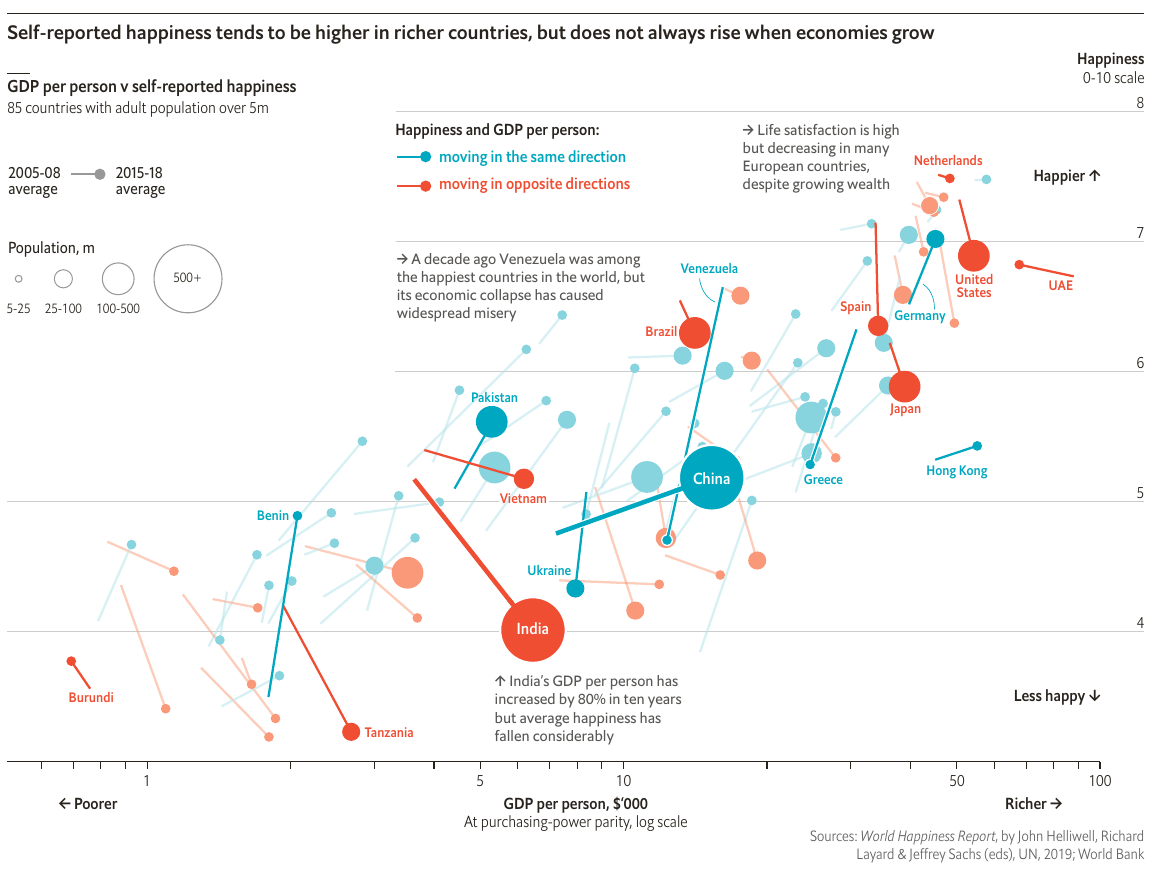

In [200]:
Image("./images/02-happiness-economics.png")

### Datos

El equipo del The Economist publicaron su código para la extracción y procesamiento de datos en [su GitHub](https://github.com/TheEconomist/graphic-detail-data/tree/master/data/2019-03-23_happiness-economics). De hecho, el código para hacer el gráfico también está incluido, pero -lamentablemente para ustedes- usan R en vez de Python. Los datos ya han sido bajados y compilados, los cuales se ubican en `data/02-happiness-economics.csv`

### Ayuda 1

Si se dan cuenta, hay datos para un total de 125 países en el archivo `csv`, pero en el gráfico solo hay 85. Si se fijan bien en [la metodologia publicada](https://github.com/TheEconomist/graphic-detail-data/blob/master/data/2019-03-23_happiness-economics/README.Rmd#L160), el The Economist selecciona los países con una población de más de 5 millones de personas en el año 2018 para graficarlos (de ahí que sean menos).

### Ayuda 2

El color de cada círculo está relacionado al valor de la columna `paradox`.

In [201]:
scat_dat = pd.read_csv(r".\data\02-happiness-economics.csv",index_col=0)
scat_dat["gdp.pc"] = scat_dat["gdp.pc"]/1000
hightlight = ["Burundi","Benin","Tanzania","India","Ukraine","Vietnam","Pakistan","China","Brazil","Venezuela","Greece","Spain","Japan",
              "Germany","Netherlands","United States","United Arab Emirates","Hong Kong"]
hightlight_df = scat_dat[scat_dat['name'].isin(hightlight)]

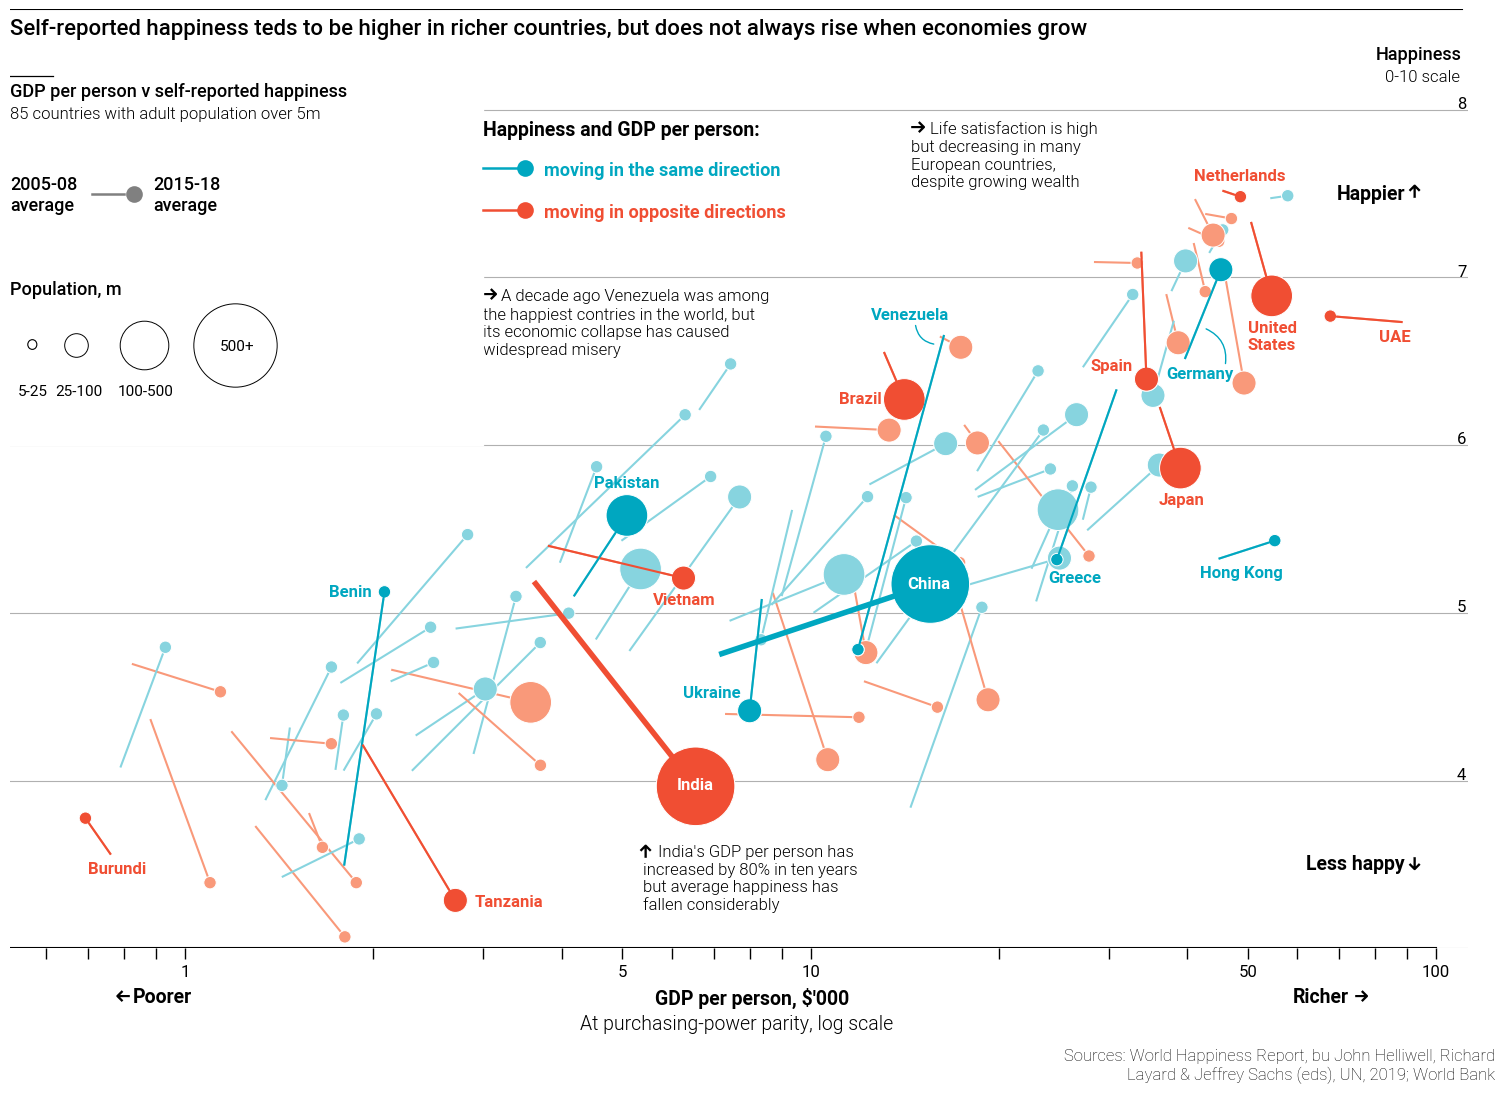

In [730]:
# Filter plot data -- for adult population >5m. Reduces number of countries from 125 to 85 pairs
iso2c_select = scat_dat.query("year == 2018 and pop > 5000000")['iso2c']
# scatterplot 
size_break= {'<25m' : 80 , '25m-100m' : 300, '100m-500m' : 900, '500m+' : 3200}
fig, ax = plt.subplots(figsize=(15, 10))
scat_plot = sns.scatterplot(
        data=scat_dat[(scat_dat['year'] == 2018) & (scat_dat['iso2c'].isin(iso2c_select))],
        x='gdp.pc',
        y='happy',
        hue='paradox',
        size='pop.break',
        alpha=1,
        palette={False: "#87d4df", True: "#f9997a"},
        sizes=size_break,
        legend=False,
        zorder=5,
)

# añadir las lineas de los paises
for country in iso2c_select:
    country_data = scat_dat[scat_dat['iso2c'] == country].sort_values('year')
    if(country_data["paradox"].iloc[0]):
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="#f9997a", zorder=3)
    else:
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="#87d4df", zorder=3)

# circulos paises remarcados
scat_plot_high = sns.scatterplot(
        data=hightlight_df[(hightlight_df['year'] == 2018)],
        x='gdp.pc',
        y='happy',
        hue='paradox',
        size='pop.break',
        alpha=1,
        palette={False: "#00a7c0", True: "#f04e33"},
        sizes=size_break,
        legend=False,
        zorder=10
        
)


# añadir las lineas de los paises remarcados
for country in hightlight:
    country_data_high = hightlight_df[hightlight_df['name'] == country].sort_values('year')
    if(country_data_high["paradox"].iloc[0]):
        plt.plot(country_data_high['gdp.pc'], country_data_high['happy'], alpha=1, color="#f04e33", zorder=11)
    else:
        plt.plot(country_data_high['gdp.pc'], country_data_high['happy'], alpha=1, color="#00a7c0", zorder=11)

China = hightlight_df[hightlight_df['name'] == "China"].sort_values('year')
India = hightlight_df[hightlight_df['name'] == "India"].sort_values('year')
plt.plot(China['gdp.pc'], China['happy'], alpha=1, color="#00a7c0", zorder=11, lw=4)
plt.plot(India['gdp.pc'], India['happy'], alpha=1, color="#f04e33", zorder=11, lw=4)

#nombres paises remarcados

scat_plot.spines['left'].set_visible(False)
scat_plot.spines['right'].set_visible(False)
scat_plot.spines['top'].set_visible(False)
scat_plot.spines['bottom'].set_visible(False)
scat_plot.grid(visible=True, axis="y")

# ajuste de ticks para los ejes
scat_plot.tick_params(axis='y', which='both', labelfontfamily= 'Roboto', left=False, length=0,labelsize=12) # Yticks
scat_plot.tick_params(axis='x', which='both', labelfontfamily= 'Roboto', length=8,width=1,labelsize=12) # Xticks
scat_plot.set_xscale('log')

# Y axis
scat_plot.set_ylim(3, 8.6)
scat_plot.set_yticklabels([])
scat_plot.set_ylabel("")

# X axis
scat_plot.set_xticks([1,5,10,50,100])
scat_plot.set_xticklabels([1,5,10,50,100],)
scat_plot.set_xlabel("")
for i in [4,5,6,7,8]:
    scat_plot.text(x=108,y=i+0.01,s=i, fontfamily='Roboto', size=12)
scat_plot.add_artist(lines.Line2D([0.1,100],[3,3],color='k',zorder=16))    

#borrar parte del grid
scat_plot.add_artist(patches.Rectangle((0,6),width=3,height=3,color='w',zorder=15))

#linea top
scat_plot.add_artist(lines.Line2D([0.001,110],[8.6,8.6],color='k',zorder=16))

#titulo
scat_plot.text(x=0.525,y=8.45,s="Self-reported happiness teds to be higher in richer countries, but does not always rise when economies grow",
               zorder=16, size=16, weight=500, fontfamily='Roboto')
#linea chica
scat_plot.add_artist(lines.Line2D([0.001,0.615],[8.2,8.2],color='k',zorder=16, lw=0.9))

#subitulo
scat_plot.text(x=0.525,y=8.08,s="GDP per person v self-reported happiness",
               zorder=16, size=13, weight=500, fontfamily='Roboto')
scat_plot.text(x=0.525,y=7.95,s="85 countries with adult population over 5m",
               zorder=16, size=12, weight=300, fontfamily='Roboto')

#yaxis label
scat_plot.text(x=80,y=8.3,s="Happiness",
               zorder=16, size=13, weight=500, fontfamily='Roboto')
scat_plot.text(x=83,y=8.17,s="0-10 scale",
               zorder=16, size=12, weight=300, fontfamily='Roboto')

#legenda1
#farrow
scat_plot.plot([0.71,0.8],[7.5,7.5],zorder=16,color='0.5',lw=1.8)
scat_plot.plot(0.83,7.5,marker='o',ms=12,zorder=16,mfc='0.5',mew=0)

#texto
scat_plot.text(x=0.525,y=7.4,s="2005-08\naverage", zorder=16, size=13, weight=500, fontfamily='Roboto')
scat_plot.text(x=0.89,y=7.4,s="2015-18\naverage", zorder=16, size=13, weight=500, fontfamily='Roboto')
scat_plot.text(x=0.525,y=6.9,s="Population, m", zorder=16, size=13, weight=500, fontfamily='Roboto')

#circulos

scat_plot.add_artist(patches.Ellipse(xy=(0.57,6.6),width=.019,height=.058,zorder=16,color='k',lw=.8,fill=False,)) #nose pq alargaba el plot hacerlo con un marker
scat_plot.plot(.67,6.6,marker='o',ms=17,zorder=16,fillstyle='none',mec='k',mew=0.7)
scat_plot.plot(.86,6.6,marker='o',ms=35,zorder=16,fillstyle='none',mec='k',mew=0.7)
scat_plot.plot(1.2,6.6,marker='o',ms=60,zorder=16,fillstyle='none',mec='k',mew=0.7)

#textos circulos
scat_plot.text(x=0.54,y=6.3,s="5-25", zorder=16, size=11, weight=350, fontfamily='Roboto')
scat_plot.text(x=0.62,y=6.3,s="25-100", zorder=16, size=11, weight=350, fontfamily='Roboto')
scat_plot.text(x=0.78,y=6.3,s="100-500", zorder=16, size=11, weight=350, fontfamily='Roboto')
scat_plot.text(x=1.135,y=6.565,s="500+", zorder=16, size=11, weight=350, fontfamily='Roboto')

#leyenda 2
scat_plot.text(x=3,y=7.85,s="Happiness and GDP per person:", zorder=16, size=14, weight=600, fontfamily='Roboto')
scat_plot.plot([3.,3.4],[7.65,7.65],zorder=16,color='#00a7c0',lw=1.8)
scat_plot.plot(3.5,7.65,marker='o',ms=12,zorder=16,mfc='#00a7c0',mew=0)
scat_plot.text(x=3.75,y=7.61,s="moving in the same direction", zorder=16, size=13, weight=600, fontfamily='Roboto', color='#00a7c0')

scat_plot.plot([3.,3.4],[7.4,7.4],zorder=16,color='#f04e33',lw=1.8)
scat_plot.plot(3.5,7.4,marker='o',ms=12,zorder=16,mfc='#f04e33',mew=0)
scat_plot.text(x=3.75,y=7.36,s="moving in opposite directions", zorder=16, size=13, weight=600, fontfamily='Roboto', color='#f04e33')

#texto venezuela
scat_plot.text(x=2.9, y=6.85, s="\u2192", size=20,fontfamily="sans-serif",weight=200)
scat_plot.text(x=3.2, y=6.862, s="A decade ago Venezuela was among", size=12,fontfamily="Roboto",weight=300)
scat_plot.text(x=3.0, y=6.545, s="the happiest contries in the world, but\nits economic collapse has caused\nwidespread misery",
            size=12,fontfamily="Roboto",weight=300)

#texto europa
scat_plot.text(x=14, y=7.85, s="\u2192", size=20,fontfamily="sans-serif",weight=200)
scat_plot.add_artist(patches.Rectangle((14,7.85),width=0.4,height=0.1,color='w',zorder=15))
scat_plot.text(x=15.5, y=7.86, s="Life satisfaction is high", size=12,fontfamily="Roboto",weight=300)
scat_plot.text(x=14.5, y=7.545, s="but decreasing in many\nEuropean countries,\ndespite growing wealth",
            size=12,fontfamily="Roboto",weight=300)

#texto india
scat_plot.text(x=5.2, y=3.5, s="\u2191", size=20,fontfamily="sans-serif",weight=200)
scat_plot.add_artist(patches.Rectangle((5.2,3.5),width=0.4,height=0.04,color='w',zorder=15))
scat_plot.text(x=5.7, y=3.55, s="India's GDP per person has", size=12,fontfamily="Roboto",weight=300, zorder=16)
scat_plot.text(x=5.4, y=3.23, s="increased by 80% in ten years\nbut average happiness has\nfallen considerably",
            size=12,fontfamily="Roboto",weight=300, zorder=16)

#xaxis label
fig.text(x=0.44, y=-0.01, s="GDP per person, $'000",weight='bold', fontfamily='Roboto',size=14)
fig.text(x=0.39, y=-0.035, s="At purchasing-power parity, log scale",weight='300', fontfamily='Roboto',size=14)

#poorer
fig.text(x=.08, y=-0.01, s="\u2190", size=20,fontfamily="sans-serif",weight=200)
fig.add_artist(patches.Rectangle((0.09,-0.01),width=0.004,height=0.04,color='w',zorder=15))
fig.text(x=0.092, y=-0.008, s="Poorer",weight='bold', fontfamily='Roboto',size=14,zorder=16)

#richer
fig.text(x=.9, y=-0.01, s="\u2192", size=20,fontfamily="sans-serif",weight=200)
fig.add_artist(patches.Rectangle((0.901,-0.01),width=0.005,height=0.04,color='w',zorder=15))
fig.text(x=0.865, y=-0.008, s="Richer",weight='bold', fontfamily='Roboto',size=14,zorder=16)

#source
fig.text(x=1, y=-0.085, s="Sources: World Happiness Report, bu John Helliwell, Richard\nLayard & Jeffrey Sachs (eds), UN, 2019; World Bank",
        weight='270', fontfamily='Roboto',size=12, ha='right')

#happier
fig.text(x=.938, y=0.79, s="\u2191", size=20,fontfamily="sans-serif",weight=200)
fig.add_artist(patches.Rectangle((0.945,0.789),width=0.004,height=0.007,color='w',zorder=17))
fig.text(x=0.94, y=0.795, s="Happier",weight='bold', fontfamily='Roboto',size=14,zorder=17,ha='right')

#less happy
fig.text(x=.938, y=0.125, s="\u2193", size=20,fontfamily="sans-serif",weight=200)
fig.add_artist(patches.Rectangle((0.945,0.138),width=0.004,height=0.05,color='w',zorder=17))
fig.text(x=0.94, y=0.125, s="Less happy",weight='bold', fontfamily='Roboto',size=14,zorder=17,ha='right')

#highlight text
scat_plot.text(x=0.7, y=3.45, s="Burundi", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=1.7, y=5.10, s="Benin", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=2.9, y=3.25, s="Tanzania", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=6.1, y=3.95, s="India", size=12,fontfamily="Roboto",weight=700, zorder=16, color='w')
scat_plot.text(x=6.25, y=4.5, s="Ukraine", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=5.6, y=5.05, s="Vietnam", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=4.5, y=5.75, s="Pakistan", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=14.28, y=5.15, s="China", size=12,fontfamily="Roboto",weight=700, zorder=16, color='w')
scat_plot.text(x=11.1, y=6.25, s="Brazil", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=12.5, y=6.75, s="Venezuela", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=24., y=5.18, s="Greece", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=42., y=5.21, s="Hong Kong", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=36, y=5.65, s="Japan", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=28, y=6.45, s="Spain", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=37., y=6.4, s="Germany", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#00a7c0')
scat_plot.text(x=50, y=6.57, s="United\nStates", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=41, y=7.58, s="Netherlands", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')
scat_plot.text(x=81, y=6.62, s="UAE", size=12,fontfamily="Roboto",weight=700, zorder=16, color='#f04e33')



#venezuela farrow
scat_plot.add_patch(patches.FancyArrowPatch((14.7,6.73), (15.9,6.6), connectionstyle="arc3,rad=0.4", arrowstyle='-',color='#00a7c0')) 
#Alemania farrow
scat_plot.add_patch(patches.FancyArrowPatch((46,6.47), (42.5,6.7), connectionstyle="arc3,rad=0.4", arrowstyle='-',color='#00a7c0')) 


plt.tight_layout()
plt.show()
